# Mini-Projet de Statistiques
## $$Three\ Mile\ Island $$
### *Préparé par:* 
    Bourhan Dernayka

___
### $$EXERCICE\ 1$$

___
#### EX 1.1 Data Acquiring

In [3]:
import pandas as pd

filename="NuclearPowerAccidents2016"
na_values = ['']
fields = ['Date', 'Cost (millions 2013US$)']
df = pd.read_csv(filename + '.csv', sep=',', usecols=fields, low_memory = False, na_values=na_values)
df = df.dropna()
df['Date'] = pd.to_datetime(df['Date']) # format = '%d/%m/%Y'
df = df.set_index(['Date'], drop=True)
df = df.sort_index()

In [4]:
len(df)

175

La date de l'accident est: 
> March 28, 1979

ce qui indique qu'on doit enlever tout les données enregistrées depuis la date 1979-03-28

In [5]:
endDate = "1979-03-27"
endDate = pd.to_datetime(endDate)
df=df[:endDate]
costs = df['Cost (millions 2013US$)']

In [6]:
n=len(df)
n

55

___
#### Ex 1.2 Normal QQ-plots
 >partie  a

$X$ suit le loi normale de moyenne $\mu$ et de variance $\sigma^2$, donc $$ X \sim N (\mu, \sigma^2)$$
Posons $ Z = \frac{X - \mu}{\sqrt{\sigma^2}}$ une variable aléatoire qui suit la loi Normale (Gaussienne) centrale, et reduite.donc, 

$$ Z = \frac{X - \mu}{\sqrt{\sigma^2}} \sim N (0, 1)$$


On deduit que $$ X = \mu + \sqrt{\sigma^2} . Z$$
Or, $ X \sim N (\mu, \sigma^2)$ alors sa $p$-quantile s'écrit ( pour $p \in ]0,1[$ ): 
$$ F^{-1}(p;\mu, \sigma^2) = \mu + \sigma.\Phi^{-1}(p)$$
et $ Z \sim N (0, 1)$ alors sa $p$-quantile s'écrit: 
$$ F^{-1}(p;0, 1) = 0 + 1.\Phi^{-1}(p) = \Phi^{-1}(p)$$
On obtient donc: $$F^{-1}(p;\mu, \sigma^2) = \mu + \sqrt{\sigma^2} . F^{-1}(p;0, 1)$$
CQFD

>partie b

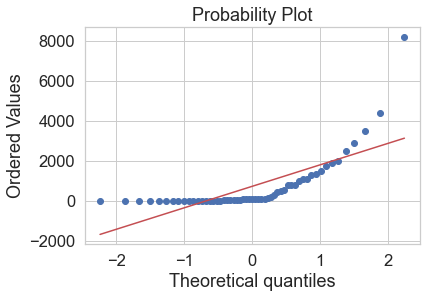

In [7]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5, style="whitegrid")
resNorm = stats.probplot(costs,dist = stats.distributions.norm, plot=plt)

___
#### Ex 1.3 Exponential QQ-plots

>partie a

$X$ suit le loi exponentielle à paramètre $\lambda$, $X \sim \varepsilon\ (\lambda)$. Alors, sa densité de probabilité sera:$$f(x;\lambda)=\lambda e^{-\lambda x},\ x\geq0$$
D'où sa fonction de répartition :$$F(x;\lambda) = \int_0^x \lambda e^{-\lambda t}dt = 1 - e^{-\lambda.x} $$
En calculant l'inverse de $F(x;\lambda)$, on obtient la $p$-quantile de $X$. Elle s'écrit : 
$$y = 1 - e^{-\lambda.x}\\- e^{-\lambda.x}= y - 1 \\e^{-\lambda.x}=1-y\\-\lambda.x=\ln(1-y)\\x=-\frac{1}{\lambda}{\ln(1-y)}$$ 
En remplacant $x$ par $F^{-1}$ et $y$ par $p$ avex $p \in ]0,1[$ :
$$F^{-1}(p;\lambda) = -\frac{1}{\lambda}{\ln(1-p)}$$
Pour une variable aleatoire qui suit la loi exponentielle normalisée: $Y \sim exp (1)$, sa $p$-quantile s'écrit: 
$$F^{-1}(p;1) = -\frac{1}{1}{\ln(1-p)} = -\ln(1-p)$$
On obtient donc: $$F^{-1}(p;\lambda) = \frac{1}{\lambda}{F^{-1}(p;1)}$$
CQFD

>partie b

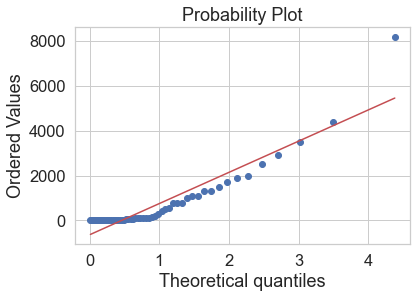

In [8]:
resExpon = stats.probplot(costs,dist = stats.distributions.expon, plot=plt)

___
#### Ex 1.4 Conclusion

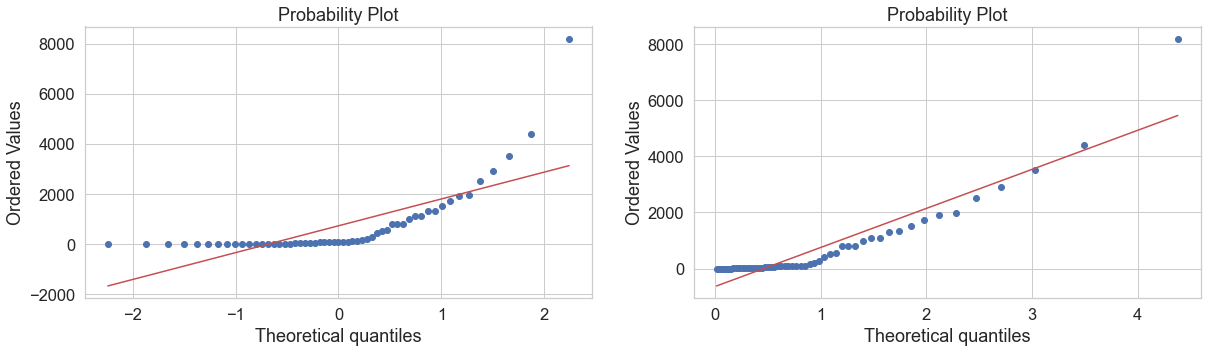

In [9]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
resNorm = stats.probplot(costs,dist = stats.distributions.norm, plot=ax1)
resExpon = stats.probplot(costs,dist = stats.distributions.expon, plot=ax2)

D'après la definition des QQ-plots et leurs utilités à comparer la distribution de deux variables aleatoires en traçant leurs quantiles, l'une en fonction de lautre (dans notre cas, la distribution théorique contre celle obtenue actuellement), 
on peut déduire que la distribution exponentielle semble être plus plausible que celle du modèle normale.

On peut aisement voir dans la première figure au-dessus que les points ne sont pas assez lineaire, en indiquant un peu une exponentiation par rapport à la droite représentant la loi Normale. (c'était alors previsible que les coûts suivent une loi exponentielle)

Par contre, pour le diagramme Qentile-Qentile de la loi exponentielle contre les coûts des accidents avant Three Mile Island, on peut remarqué une colinearité entre les distributions, indiquant que les coûts sont plus probablement distribués exponentiellement.

___
### $$EXERCICE\ 2$$

___
### Ex 2.1

D'après la donnée, $\mathbb{P}_\lambda(X_1>x) = \exp^{-\lambda x}$ pour $x\geq0$, et 1 sinon.

Alors la fonction de repartition de $X_1$ sera : 
$$F(X_1) = \mathbb{P}_\lambda(X_1\leq x) = 1 - \exp^{-\lambda x}$$
Alors, on calcule la densité de probabilité $\mathbb{P}(X_1,\lambda)=\ f(X_1,\lambda)$ en dérivant par rapport à X_1:
$$  f(X_1,\lambda) =\ \frac{\partial F(X_1)}{\partial X_1} = \frac{\partial (1 - \exp^{-\lambda X_1})}{\partial X_1}=\lambda \exp^{-\lambda X_1}$$
Or on a considéré les accidents indépendants et identiquements distribués, alors:
$$\mathbb{P}(X,\lambda) = \prod_{i=1}^n\mathbb{P}(X_i,\lambda)$$
Donc, la densité de probabilité du vecteur $X$ est: 
$$\mathbb{P}(X,\lambda) = \lambda^n \exp^{-\lambda \sum_{i=1}^nX_i}$$
 
___

Pour trouver l'estimateur de maximum vraisemblance de $\lambda$, on pose l'estimateur $\widehat{\theta}_{MV}(X)= \widehat{\lambda}_n$ qui verifie la relation: 
$$\widehat{\theta}_{MV}(X) = \arg \min_{t \in \Theta}{M(X,t)}$$
où $M(X,t)$ est un contraste donné par :
$$M(X,t)=- \log{\mathbb{P}(X,t)} = -\log{f(X,t)}$$
Donc, $ \widehat{\lambda}_n$ sera la valeur qui minimise $M(X,t)$.

Resolvons l'equation 
$\frac{\partial M(X,t)}{\partial t} = 0$
$$\frac{\partial (-\log{\mathbb{P}(X,t))}}{\partial t} = 0$$
$$\frac{\partial [-\log{(t^n\ \exp^{-t \sum_{i=1}^n X_i} })]}{\partial t} = 0$$
$$\frac{n t^{n-1}\exp^{-t \sum_{i=1}^n X_i} - t^n \sum_{i=1}^n X_i \exp^{-t \sum_{i=1}^n X_i}}
{t^n\ \exp^{-t \sum_{i=1}^n X_i}} 
= 0 $$
En simplifiant, on obtient:
$$n t^{-1} -\sum_{i=1}^n X_i=0$$
D'où l'estimateur de max vraisemblance sera:
$$  \widehat{\lambda}_n=\widehat{t}=\frac{n}{\sum_{i=1}^n X_i}$$

___
### Ex 2.2

Calcule de $\lambda_n$ :

In [10]:
import numpy as np
totalCases = len(df) #n
totalCosts = costs
lambdaN = len(costs)/np.sum(totalCosts)
print("La valeure calculée de $lambda_n$ est",lambdaN)

La valeure calculée de $lambda_n$ est 0.0013767725947156965


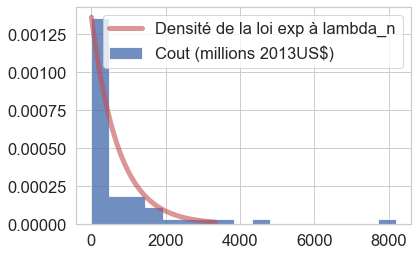

In [11]:
from scipy.stats import expon
fig, ax = plt.subplots(1, 1)
moyenne = 1/lambdaN
x = np.linspace(expon.ppf(0.01,scale=moyenne), expon.ppf(.99,scale=moyenne),100)
ax.plot(x, expon.pdf(x,0,moyenne),'r-', lw=5, alpha=0.6, label='Densité de la loi exp à lambda_n')
entries, bin_edges, c=ax.hist(costs, density=True, histtype='stepfilled', 
                              alpha=0.8,label='Cout (millions 2013US$)',
                             bins = 17)
#print(sum(entries * np.diff(bin_edges)))
ax.legend(loc='best', frameon=True)
plt.show()

___
#### Ex 2.3

Le modèle est regulier. Grandeur d'intérêt : $g_1(\lambda)=\frac{1}{\lambda}$; Statistique d'étude : $T_1(X)= \frac{1}{n}\sum_{i=1}^nX_i$

Pour que $T_1(X)$ soit un estimateur efficace pour $g_1(\lambda)$, il doit verifier ces deux conditions:
>1- $T_1(X)$ est sans biais ==> $b(g_1,T_1) = 0$

>2- la variance de $T_1(X)$ doit atteindre la borne de Cramer-Rao


1- Pour la première condition:
$$
    b(g_1,T_1) = \mathbb{E}_\lambda[T_1(X)-g_1(\lambda)] = \mathbb{E}_\lambda[\frac{1}{n}\sum_{i=1}^nX_i - \frac{1}{\lambda}]\\
    b(g_1,T_1) = \frac{1}{n}\mathbb{E}_\lambda[\sum_{i=1}^nX_i] - \frac{1}{\lambda}\\
    b(g_1,T_1) = \frac{1}{n}\sum_{i=1}^n\mathbb{E}_\lambda[X_i] - \frac{1}{\lambda}\\
$$
Or, les les accidents indépendants et identiquements distribués, alors $X_i \stackrel{i.i.d.}{\sim} \varepsilon\ (\lambda)$, et $\mathbb{E}_\lambda[X_i] = 1/\lambda$, d'où :
$$
     b(g_1,T_1) = \frac{1}{n}\sum_{i=1}^n\frac{1}{\lambda} - \frac{1}{\lambda} = 0
$$

2- Pour la deuxième condition, on doit calculé la borne de Cramer-Rao, qui est une borne inférieure de la variance de l'estimateur $T_1$, 
cad $\mathbb{V}ar_\lambda(T_1) \geq borneCR$.

Au debut, $$borneCR = \frac{[g_1'(\lambda)]^2}{I(\lambda)} = \frac{[-1/\lambda^2]^2}{I(\lambda)} = \frac{\frac{1}{\lambda^4}}{I(\lambda)}$$

où $I(\lambda)$ est l'information de Fisher contenu dans la variable d'étude. Dans notre cas c'est le vercteur $X$ de dimension $n$. Or, l'information de Fisher est additive, donc $I(\lambda) = n I_1(\lambda)  $

Elle est donnée par:      $I(\lambda) := \mathbb{E}_\lambda[\ (\frac{\partial \log{\mathbb{P}(X,\lambda)}} {\partial\lambda})^2\ ]$

Or, $\mathbb{P}(X,\lambda)$ est infiniment differentiable (il suffit deux) par rapport à $\lambda$ (loi exponentielle), alors :
$$
I_1(\lambda) = - \mathbb{E}_\lambda[\ \frac{\partial^2 \log{\mathbb{P}(x,\lambda)}} {\partial\lambda^2}]\\
    I_1(\lambda) = - \mathbb{E}_\lambda[\ \frac{\partial^2 \log(\lambda\exp^{-\lambda x})} {\partial\lambda^2}]= - \mathbb{E}_\lambda[\ \frac{\partial^2 (\log\lambda-\lambda x)} {\partial\lambda^2}]\\
            I_1(\lambda) = - \mathbb{E}_\lambda[\ \frac{\partial (1/\lambda - x)} {\partial\lambda}]= - \mathbb{E}_\lambda[-1/\lambda^2 - 0]\\
                I_1(\lambda) = \frac{1}{\lambda^2}
$$
Donc, $ I(\lambda)= \frac{n}{\lambda^2}$

D'où la borne de Cramer Rao sera: $$borneCR = \frac{\frac{1}{\lambda^4}}{\frac{n}{\lambda^2}} = \frac{1}{n\lambda^2}$$

Cherchons la variance de l'estimateur $g_1(\lambda)$:

$$\mathbb{V}ar_\lambda(T_1) = \mathbb{V}ar_\lambda(\frac{1}{n}\sum_{i=1}^nX_i) = \frac{1}{n^2}\mathbb{V}ar_\lambda(\sum_{i=1}^nX_i)$$

Or, les les accidents indépendants et identiquements distribués, alors : 
$\mathbb{V}ar_\lambda(\sum_{i=1}^nX_i)= \sum_{i=1}^n\mathbb{V}ar_\lambda [X_i]$. Donc,

$$
\mathbb{V}ar_\lambda(T_1) = \frac{1}{n^2}\sum_{i=1}^n\mathbb{V}ar_\lambda [X_i] = \frac{1}{n^2}\sum_{i=1}^n\frac{1}{\lambda^2} =
\frac{1}{n^2}\frac{n}{\lambda^2}\\ \mathbb{V}ar_\lambda(T_1) = \frac{1}{n\lambda^2} = borneCR
$$

Donc, $T_1(X)$ vérifie les deux conditions d'efficacité et il est efficace.

___
#### Ex 2.4

Calcul de $g_1$:

In [12]:
T1 = np.sum(totalCosts)/totalCases
print("L'estimation de g1 par T1 sur l'échantillon donné est","{:.3f}".format(T1),"million$")

L'estimation de g1 par T1 sur l'échantillon donné est 726.336 million$


___
#### Ex 2.5

Le nouveau estimateur est: $\tilde{T}_{1,\eta}(X) = \eta T_1(X) $

Cherchons son risque quadratique: 
$R(\lambda,\tilde{T}_{1,\eta}) = b^2_\lambda(\tilde{T}_{1,\eta}) +\mathbb{V}ar_\lambda(\tilde{T}_{1,\eta})$

tel que $$b_\lambda(g_1,\tilde{T}_{1,\eta}) = \mathbb{E}_\lambda[\tilde{T}_{1,\eta}-g_1(\lambda)] = \mathbb{E}_\lambda[\frac{\eta}{n}\sum_{i=1}^nX_i - \frac{1}{\lambda}]\\
    b(g_1,\tilde{T}_{1,\eta}) = \frac{\eta}{n}\mathbb{E}_\lambda[\sum_{i=1}^nX_i] - \frac{1}{\lambda}= \frac{\eta}{n}\sum_{i=1}^n\mathbb{E}_\lambda[X_i] - \frac{1}{\lambda}\\
    b(g_1,\tilde{T}_{1,\eta}) = \frac{\eta}{n}\sum_{i=1}^n\frac{1}{\lambda} - \frac{1}{\lambda}= \frac{\eta}{\lambda} - \frac{1}{\lambda}\\
    b(g_1,\tilde{T}_{1,\eta}) = \frac{\eta-1}{\lambda}
$$

et que

$$\mathbb{V}ar_\lambda(\tilde{T}_{1,\eta}) = \mathbb{V}ar_\lambda(\frac{\eta}{n}\sum_{i=1}^nX_i) = \frac{\eta^2}{n^2}\mathbb{V}ar_\lambda(\sum_{i=1}^nX_i)= \frac{\eta^2}{n^2}\sum_{i=1}^n\frac{1}{\lambda^2} =
\frac{\eta^2}{n^2}\frac{n}{\lambda^2}\\ 
\mathbb{V}ar_\lambda(\tilde{T}_{1,\eta}) = \frac{\eta^2}{n\lambda^2}$$

d'où 

$$R(\lambda,\tilde{T}_{1,\eta}) = (\frac{\eta-1}{\lambda})^2 + \frac{\eta^2}{n\lambda^2} 
                                = \frac{n(\eta^2-2 \eta +1)}{n\lambda^2} + \frac{\eta^2}{n\lambda^2}\\
R(\lambda,\tilde{T}_{1,\eta})   =\frac{(n+1)\eta^2-2 n\eta +n}{n\lambda^2} $$

Pour que le nouveau risque soit inférieur à l'antécedent, il faut résoudre l'inéquation suivante:
$$(n+1)\eta^2-2 n\eta +n < 1 ==> (n+1)\eta^2-2 n\eta + n-1 < 0$$
qui possède comme solution:
$$ \frac{n-1}{n+1}<\eta<1$$
Pour notre echantillon: $$ \frac{55-1}{55+1}<\eta<1 $$
Donc, $$\frac{27}{28}<\eta<1$$

Ce résultat n'est pas en contradiction avec la question précédente puisque cet estimateur n'est pas efficace, il possède un biais non nul. C'est à dire qu'il y a une certaine region (celle retrouvée de $\eta$), où cet estimateur est meilleur que celui non pondéré par $\eta$, mais son risque serait mauvais en dehors de cette région (graphique indicative enfin de l'exercice 2). 

___
#### Ex 2.6

Soit $m_\lambda = mediane(X)$ tel que $\int_{-\infty}^{m_\lambda}\lambda\exp^{-\lambda x}.dx = 50\%$ ==> $\int_{0}^{m_\lambda}\lambda\exp^{-\lambda x}.dx = 50\%$

$ - \exp^{-\lambda x} |^m_0 = 1/2 ==> \exp^{-\lambda .0}-\exp^{-\lambda .m} = 1/2\\
 1-\exp^{-\lambda .m} = 1/2 ==> \exp^{-\lambda .m} = 1/2\\
 -\lambda .m = -ln(2)$ 

Donc, $$m_\lambda = \frac{\ln(2)}{\lambda}$$
Pour que $\tilde{T}_{1,\eta}(X)$ soit l'estimateur sans biais de la mediane, il faut que le bias : $b_\lambda(m_\lambda,\tilde{T}_{1,\eta})$ soit nul.

$$b_\lambda(m_\lambda,\tilde{T}_{1,\eta}) = \mathbb{E}_\lambda[\tilde{T}_{1,\eta}-m(\lambda)] = \frac{\eta}{n}\mathbb{E}_\lambda[\sum_{i=1}^nX_i] - \frac{\ln(2)}{\lambda} = \frac{\eta}{\lambda}- \frac{\ln(2)}{\lambda} = 0$$
 $$\eta - \ln(2) = 0\ ,\ \forall \lambda \neq 0$$
Donc,$$\eta = \ln(2)$$

Calcule de la valeure de l'estimateur $\tilde{T}_{1,\eta}(X)$ pour $\eta = \ln{2}$ sur l'échantillon donné :

In [13]:
import math
T1_tilde = math.log(2)*np.sum(totalCosts)/totalCases
T1_tilde = math.floor(T1_tilde*100)/100
print("La médiane estimée de cette echantillon est", f"{T1_tilde:,}","millions $")

La médiane estimée de cette echantillon est 503.45 millions $


Calcule de la médiane empirique:

In [14]:
median = sorted(totalCosts)[n//2]
print("La médiane empirique de cette echantillon est", f"{median:,}","millions $")

La médiane empirique de cette echantillon est 89.9 millions $


**Comparaison**

La moyenne empirique est désormais plus petite que celle estimée, ce qui est possible puisque l'echantillon de travail (n=55) n'est pas très longue, et il se peut qu'on ne voit pas la convergence.
Donc, ces deux médianes seront plus proches plus que n augmente.

___
#### Ex 2.7

Calcul du risque quadratique de $T_1(X)$: $R(\lambda, T_1) = EQM(\lambda, T_1) = \mathbb{V}ar_\lambda(T_1) = \frac{1}{n\lambda^2}$

In [15]:
risqueT1 = 1/(n*lambdaN**2)
print("le risque quadratique sous T1 est",f"{risqueT1:,}")

le risque quadratique sous T1 est 9,592.082057099926


Calcul du risque quadratique de $\tilde{T}_{1,\eta}(X)$:

$R(\lambda, \tilde{T}_{1,\eta}) = EQM(\lambda, \tilde{T}_{1,\eta}) = \mathbb{V}ar_\lambda(\tilde{T}_{1,\eta}) = \frac{(n+1)\eta^2 -2n\eta+n}{n\lambda^2}$ pour $\eta = \ln(2)$

In [16]:
eta = math.log(2)
risqueT1tilde = ((n+1)*eta**2 -2*n*eta +n)/(n*lambdaN**2)
print("le risque quadratique sous T1 tilde est",f"{risqueT1tilde:,}")

le risque quadratique sous T1 tilde est 54,283.308555590236


In [17]:
print("La difference est", risqueT1tilde - risqueT1)

La difference est 44691.22649849031


On note que le risque quadratique de $T_1$ est meilleur que $\tilde{T}_1$ et cela est prévisible car $\eta$ est hors du région $ 27/28 < \eta < 1$

In [18]:
print(math.log(2), "<",27/28)

0.6931471805599453 < 0.9642857142857143


La variation du risque quadratique de $T_1(X)$ et de $\tilde{T}_{1,\eta}(X)$ en fonction de n sera:

Le risque est strictement décroissant pour n croissante.


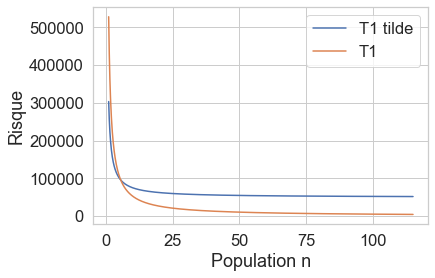

In [19]:
nVect = np.linspace(1,115,1000)
risqueT1VectN = 1/(nVect*lambdaN**2)
risqueT1tildeVectN = ((nVect+1)*eta**2 -2*nVect*eta +nVect)/(nVect*lambdaN**2)
rmin = np.min(risqueT1VectN)
mask = np.array(risqueT1VectN) == rmin
color = np.where(mask, 'yellow', 'green')
rmin = np.min(risqueT1tildeVectN)
mask = np.array(risqueT1tildeVectN) == rmin
colorT = np.where(mask, 'red', 'blue')
plt.ylabel('Risque')
plt.xlabel('Population n')
print("Le risque est strictement décroissant pour n croissante.")
plt.plot(nVect,risqueT1tildeVectN, label = "T1 tilde")
dessin=plt.plot(nVect,risqueT1VectN,label = "T1")
ax= plt.gca()
ax=ax.legend(loc='best', frameon=True)

Donc $T_1$ est meilleure que $\tilde{T}_1$ pour les grandes echantillons.

EXTRA:

Pour n fixe sur 55, on étudie la variation du rique en fonction de $\eta$:

Le minmum risque est pour eta = 0.9817948717948718
Dans ce cas, le risque est 9420.859923843498


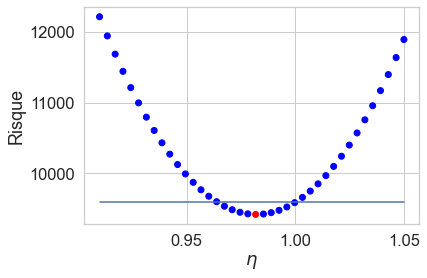

In [20]:
etaVect = np.linspace(0.91,1.05,40)
risqueVect = ((55+1)*etaVect**2 -2*55*etaVect +55)/(n*lambdaN**2)
rmin = np.min(risqueVect)
mask = np.array(risqueVect) == rmin
color = np.where(mask, 'red', 'blue')
plt.ylabel('Risque')
plt.xlabel('$\eta$')
print("Le minmum risque est pour eta =",etaVect[int(np.where(risqueVect==rmin)[0])])
print("Dans ce cas, le risque est",rmin)
dessin=plt.scatter(etaVect,risqueVect,color=color)
plt.plot(etaVect, [risqueT1]*len(etaVect))

___
### $$EXERCICE\ 3$$

___
#### Ex 3.1

Hypothèse nulle $H_0$: le coût moyen d’un accident est inférieur à un milliard de dollars

Hypothèse alternative $H_1$: le coût moyen d’un accident est supérieur ou égale à un milliard de dollars

Donc, $$H_0: 1/\lambda_0 < 1,000$$ et $$H_1: 1/\lambda_1 \geq 1,000$$

en tenant compte que l'unité de coûts est le million 2013US$

___
#### Ex 3.2

En se basant sur le principe de Neyman-Pearson, on calcule le rapport de vraisemblance résultant de notre hypothèse :

$$
   Z_{\lambda 0,\lambda 1}(X) = \frac{\mathbb{P}_{\lambda1}(X|H_1)}{\mathbb{P}_{\lambda0}(X|H_0)}
                              = \frac{f(X_{1:n})}{f(X_{1:n})}\\
                              = \frac{\prod_{i=1}^n f(X_i, \lambda_1)}{\prod_{i=1}^n f(X_i, \lambda_0)}\\
                              = \frac{\prod_{i=1}^n \lambda_1\exp{-\lambda_1 X_i}}{\prod_{i=1}^n \lambda_0\exp{-\lambda_0 X_i}}\\
                              =(\frac{\lambda_1}{\lambda_0})^n\frac{\exp^{-\sum_{i=1}^n \lambda_1 X_i}}{\exp^{-\sum_{i=1}^n \lambda_0 X_i}}\\
Z_{\lambda 0,\lambda 1}(X) = (\frac{\lambda_1}{\lambda_0})^n \exp^{-\sum_{i=1}^n (\lambda_1-\lambda_0) X_i}
$$
Or, $\lambda_1 < \lambda_0$, donc $Z_{\lambda 0,\lambda 1}(X)$ qui ne depend que du vecteur X, est strictement croissante.

Donc, le teste uniformément le plus puissant (U.P.P) est donné par l'inégalité :
$$ Z_{\lambda 0,\lambda 1}(X) > C $$
où $C$ est donnée par l'égalité :
$$ \mathbb{P}(Z_{\lambda 0,\lambda 1}(X) > C) = \alpha$$ où $\alpha$ est le niveau de signification voulu du teste.

En utilisant la statistique de l'exercice $T_1(X)$, on peut trouver la région de rejet de ce test.

**Donc, on rejette $H_0$ pour: $T_1(X) > C'$**
$$ \mathbb{P}( T_1(X) > C') = \alpha\\ \mathbb{P}( \frac{1}{n}\sum^n_{i=1}X_i > C') = \alpha\\
 \mathbb{P}( \frac{1}{n}\sum^n_{i=1}X_i \leq C') = 1 - \alpha\\
 \mathbb{P}( \sum^n_{i=1}X_i \leq nC') = 1 - \alpha
$$
Donc, en posant $q_{1-\alpha}$ le quantile de la loi de distribution de la somme des $Xi$, on obtient:

$$C' = \frac{q_{1-\alpha}}{n}$$

Or, la somme des exponentielles suit une loi $\Gamma(k,\theta)$ car:

Soit $X_{1:n}$ un vecteur de v.a. qui suient la loi exponentielle $\varepsilon(\lambda)$, donc 
$$f(X_{1:n}) = \prod_{i=1}^n f(X^i)\ \ \ where\ \ \  X^i \sim \varepsilon\ (\lambda)$$
En fonctions caractéristiques et d'après la donnée du Mini-Projet, et puisque 
$\Phi_{X+Y}(t)=\Phi_{X}(t).\Phi_Y(t) $
on peut écrire:
$$ \Phi_{\sum X}(t) = \prod_{i=1}^n \frac{1}{1-\frac{it}{\lambda}} = \frac{1}{(1-\frac{it}{\lambda})^n}$$
En posant $\theta = \frac{1}{\lambda}$, on obtient:
$$\Phi_X(t)= \frac{1}{(1-it\theta)^n}$$
On déduit donc que $\sum^n_{i=1} X_i$ suit la loi gamma $\Gamma(k= n,\theta = 1/\lambda)$

___
#### Ex 3.3

Pour l'échantillon considéré, et pur $\alpha = 0.05 = 5\%$:
$$ C' = \frac{q_{1-\alpha}^\Gamma}{n} = \frac{q^\Gamma_{0.95}}{55}$$
On utilisera la librairie stats de scipy pour trouver la valeur du quantile (on peut de même utiliser la fonction de repartition fournie de la loi Gamma).

In [21]:
c= stats.gamma.ppf(0.95, a=n, scale = 1000)/55
t1= 1/lambdaN
print("la valeur de C' est", c)
print("la valeur de T1 sur notre échantillon est", t1)

la valeur de C' est 1231.6379811669046
la valeur de T1 sur notre échantillon est 726.3363636363637


In [22]:
if t1 > c:
    print("on rejette H0, notre hypothèse est falsifiée")
else:
    print("on accepte H0, notre hypothèse est vérifiée")

on accepte H0, notre hypothèse est vérifiée


Donc, on peut aﬃrmer que le coût moyen d’accident est inférieur à un milliard de dollars 

Pour la p-valeur, elle est égale à :
$$ P(T_1(X) < t_1 obtenue\ |\ H_0) $$

or $t_1$ obtenue $= 726.336$ millionsUS$

donc, $$p\_valeur = P(T_1(X) <726.336 \ |\ H_0)\\
p\_valeur=P[\ T_1(X) <726.336 \ |\ T_1(X) \sim \Gamma(55,1000/55)\ ]\\ 
p\_valeur=\Gamma_{55,1000/55}(Z<726.336)
$$

In [23]:
pvaleur=stats.gamma.pdf(t1, a = n, scale = 1000/n)
print("la p-valeur est de l'ordre de","{:.4}".format(pvaleur*100),"%")
print("p-valeur =",pvaleur)

la p-valeur est de l'ordre de 0.03226 %
p-valeur = 0.00032259476176334467


___
#### Ex 3.4

Comme on a juste démontré dans la question 3.2 que la somme des $X_i$ suit la loi Gamma tel que :
$$ \sum_{i=1}^n X_i \sim \Gamma(n, 1/\lambda)$$
alors la statistique $T_1(X)= \frac{1}{n}\sum_{i=1}^nX_i$ est telle que:
$$ T_1 \sim \Gamma (k = n, \theta = \frac{1}{n\lambda})$$
Dressons la densité de probabilité de $T_1(X)$ pour un moyen de coût des accidents égale à 1 milliardsUS$ = 1000 millionsUS$, donc $\lambda = 1/1000$:

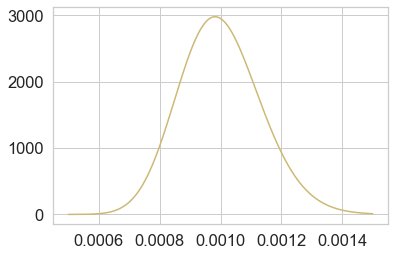

In [24]:
theta = 1/1000
x = np.linspace (0.0005, 0.0015, 500) 
y = stats.gamma.pdf(x, a=n, scale = theta/n) 
a=plt.plot(x, y, "y-", label=(r'$\alpha (k)=55, \theta=1/1000[par million$]$'))

Région de rejet:

Elle est donné pour les abscisse au delà des quelles la surface de la distrubtion devient plus grande que 95% de sa surface maximale.

0.9503953058868064

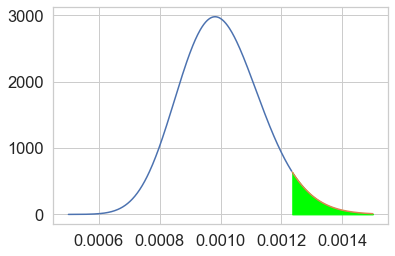

In [25]:
totalArea = np.trapz(y, dx=5)
area = 0
i=0
while(area<totalArea*0.95 and i<len(y)):
    area =np.trapz(y[:i], dx=5)
    i+=1

plt.plot(x[:i],y[:i],x[i:],y[i:])
a=plt.fill_between(x[i:],y[i:], color = 'lime')
area/totalArea

___
#### Ex 3.5

La fonction de puissance d'un test est donnée par la probabilité que l'échantillon soit rejeté par le test en tant que $H_0$ est fausse, celà est donné par:
$$Puissance = \mathbb{P}(T_1 \in \bar{A}\ |\ H_1) = 1 - \mathbb{P}(T_1 \in A\ |\ H_1)$$
Dans notre cas,
$$Puissance = 1 - \mathbb{P}(T_1(X) < C'\ |\ H_1)\ \ \ /\ \ \ C' = 1231.638$$
 
Or, sous $H_1$, on a que $\lambda \leq 1/1000$, donc pour la densité de probabilité de $T_1$, $\theta$ varie sur l'intervale ouvert ]0,1000[

Domc, 
$$Puissance (\lambda) = \Gamma_{n,\frac{1}{n\lambda}}((n,\lambda); Z < 1231.638)$$

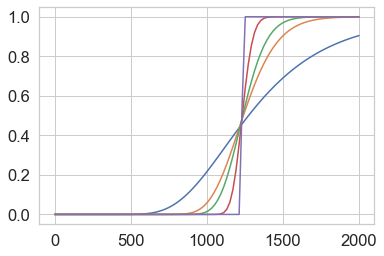

In [26]:
n_vect = [10,50, 100, 500, 100000]
scale = np.linspace(0.01,2000, 100)
for nb in n_vect:
    y5 = 1-stats.gamma.cdf(c, a=nb, scale=scale/nb)
    plt.plot(scale, y5, label=nb)

On remarque que plus qu'on augmente la longueur de l'echantillon, plus que la raideur de la fonction de puissance augmente, donc elle devient plus puissante.

Les courbures indiquent que dans la zone de $H_1$ cad $1/\lambda$ < 1000, la puissance de test est presque nulle, ce qui indique des bonnes résultats auprès de ces tests.

___
#### Ex 3.6

La statistique $T_1$ possède comme espérance $\mathbb{E}(T_1,\lambda)=1/\lambda$ et variance $\mathbb{V}ar(T_1,\lambda)=\frac{1}{n.\lambda^2}$.

Or, le théorème central limite établit la convergence en loi de la somme d'une suite de variables aléatoires ayant leur espérance et variance connus,  vers la loi normale.

D'où on peut assimiler la variable $T_1$ une loi de distribution Normale tel que: 
$$ T_1 \sim N\ (\ \mu = \mathbb{E}(T_1,\lambda), \sigma^2 = \mathbb{V}ar(T_1,\lambda)\ )$$

Totalement écrite :
$$ T_1 \sim N (\mu = \frac{1}{\lambda}, \sigma = \frac{1}{\lambda\sqrt{n}})$$

Pour $\lambda$ = 1 / 1000: (echelle par 1 million$)

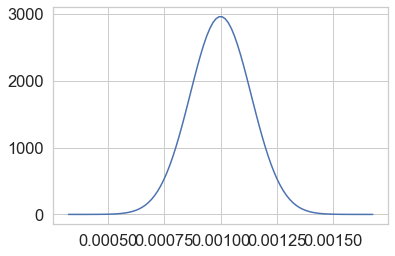

In [27]:
mu = 1/1000
variance = mu**2/55
sigma = math.sqrt(variance)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

**D'abord, on remarque la ressemblance entre les deux graphes de lois Gamma et Normale pour $T_1$**

Test proposé : On adopte la même hypothèse de 3.1, et 
de la même façon expliquée en 3.2-3, et en adoptant encore la statistique $T_1(X)$, le test revient à comparer:
 $$T_1(X) > C''$$
 où $C''$ peut être calculer comme suit:
$$ \mathbb{P}( T_1(X) > C'') = \alpha\\ \mathbb{P}(\frac{T_1(X)-\frac{1}{\lambda}}{\frac{1}{\sqrt{n}\lambda}} > k) = \alpha\ \ \ \ \ \ /\ \ \ \ k = \frac{C''-\frac{1}{\lambda}}{\frac{1}{\sqrt{n}\lambda}}
$$
On remarque que la partie gauche est une loi Normale centralisée et réduite, $ Z \sim N(0,1)$, alors:
$$
 \mathbb{P}( Z \leq k) = 1 - \alpha\\
 \mathbb{P}( \sum^n_{i=1}X_i \leq nC') = 1 - \alpha
$$
Donc, en posant $q_{1-\alpha}^N$ le quantile de la loi $N(0,1)$, et pour $\alpha = 0.05$, on obtient:

$$k = q_{0.95}^{N(0,1)}$$


Résultats du test (programmatiquement):

In [28]:
esp = 1000
var = esp/math.sqrt(n)
k=stats.norm.ppf(0.95)
cs=k*var + esp
if t1 > cs:
    print("on rejette H0, notre hypothèse est falsifiée")
else:
    print("on accepte H0, notre hypothèse est vérifiée, car",t1,"<",c,"\nDonc, on accepte H_0")

on accepte H0, notre hypothèse est vérifiée, car 726.3363636363637 < 1231.6379811669046 
Donc, on accepte H_0


Donc, de même pour ce teste, on peut confirmer que le coût moyen des accidents est inférieur à 1 milliards de dollars américaines.

# FIN